In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection

In [2]:
df=pd.read_csv("Census-Income_dataset.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per- week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,24,Private,170070,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Female,0,0,20,United-States,<=50K
4,37,Private,126708,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,60,United-States,<=50K


In [3]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per- week,native-country,income
32095,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32096,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32097,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32098,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32099,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-   week', 'native-country',
       'income'],
      dtype='object')

Describe Dataset

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per- week
count,32100.000000,3.210000e+04,32100.000000,32100.000000,32100.000000,32100.000000
mean,38.590903,1.896941e+05,10.080561,1084.884486,86.938567,40.444704
std,13.643185,1.053900e+05,2.572453,7431.034879,402.258116,12.357375
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783220e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369108e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#Get the Number of Rows and Columns
df.shape

(32100, 15)

Get the Column Data Type

In [7]:
df.dtypes

age                   int64
workclass            object
fnlwgt                int64
education            object
education-num         int64
marital-status       object
occupation           object
relationship         object
race                 object
sex                  object
capital-gain          int64
capital-loss          int64
hours-per-   week     int64
native-country       object
income               object
dtype: object

Check Missing Values

In [8]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-   week    0
native-country       0
income               0
dtype: int64

In [9]:
le=LabelEncoder()

In [10]:
for col in df.columns:
    if df[col].dtypes =='object':
        df[col] = le.fit_transform(df[col])

In [11]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per- week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,24,4,170070,9,13,4,13,1,4,0,0,0,20,39,0
4,37,4,126708,11,9,2,1,5,4,0,0,0,60,39,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32100 entries, 0 to 32099
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                32100 non-null  int64
 1   workclass          32100 non-null  int32
 2   fnlwgt             32100 non-null  int64
 3   education          32100 non-null  int32
 4   education-num      32100 non-null  int64
 5   marital-status     32100 non-null  int32
 6   occupation         32100 non-null  int32
 7   relationship       32100 non-null  int32
 8   race               32100 non-null  int32
 9   sex                32100 non-null  int32
 10  capital-gain       32100 non-null  int64
 11  capital-loss       32100 non-null  int64
 12  hours-per-   week  32100 non-null  int64
 13  native-country     32100 non-null  int32
 14  income             32100 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


Check Unique Values

In [13]:
df.nunique()

age                     73
workclass                9
fnlwgt               21431
education               16
education-num           16
marital-status           7
occupation              15
relationship             6
race                     5
sex                      2
capital-gain           119
capital-loss            92
hours-per-   week       94
native-country          42
income                   2
dtype: int64

In [14]:
df['occupation'].value_counts()

10    4085
3     4039
4     4011
1     3726
12    3592
8     3244
7     1975
0     1816
14    1574
6     1351
5      982
13     910
11     638
9      149
2        8
Name: occupation, dtype: int64

In [15]:
df['capital-loss'].value_counts()

0       30609
1902      200
1977      165
1887      156
1848       51
        ...  
1944        1
1844        1
1816        1
2489        1
2201        1
Name: capital-loss, Length: 92, dtype: int64

Check Skewness

In [16]:
df.skew()

age                   0.557440
workclass            -0.752666
fnlwgt                1.437732
education            -0.934674
education-num        -0.309918
marital-status       -0.013518
occupation            0.115540
relationship          0.785057
race                 -2.441636
sex                  -0.719219
capital-gain         11.895821
capital-loss          4.608459
hours-per-   week     0.229955
native-country       -3.661399
income                1.212030
dtype: float64

# EDA

Percentage 4    0.697103
6    0.078131
2    0.064206
0    0.056355
7    0.039813
5    0.034330
1    0.029408
8    0.000436
3    0.000218
Name: workclass, dtype: float64


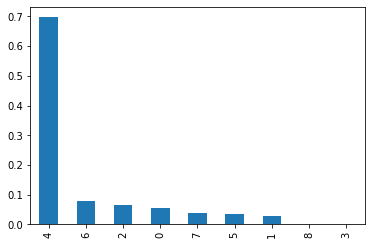

In [17]:
print('Percentage',df.workclass.value_counts(normalize=True))
df.workclass.value_counts(normalize=True).plot(kind='bar')

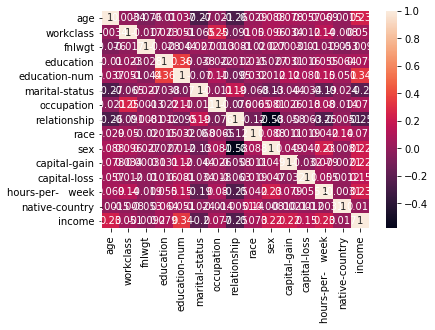

In [18]:
sns.heatmap(df.corr(),annot=True,)

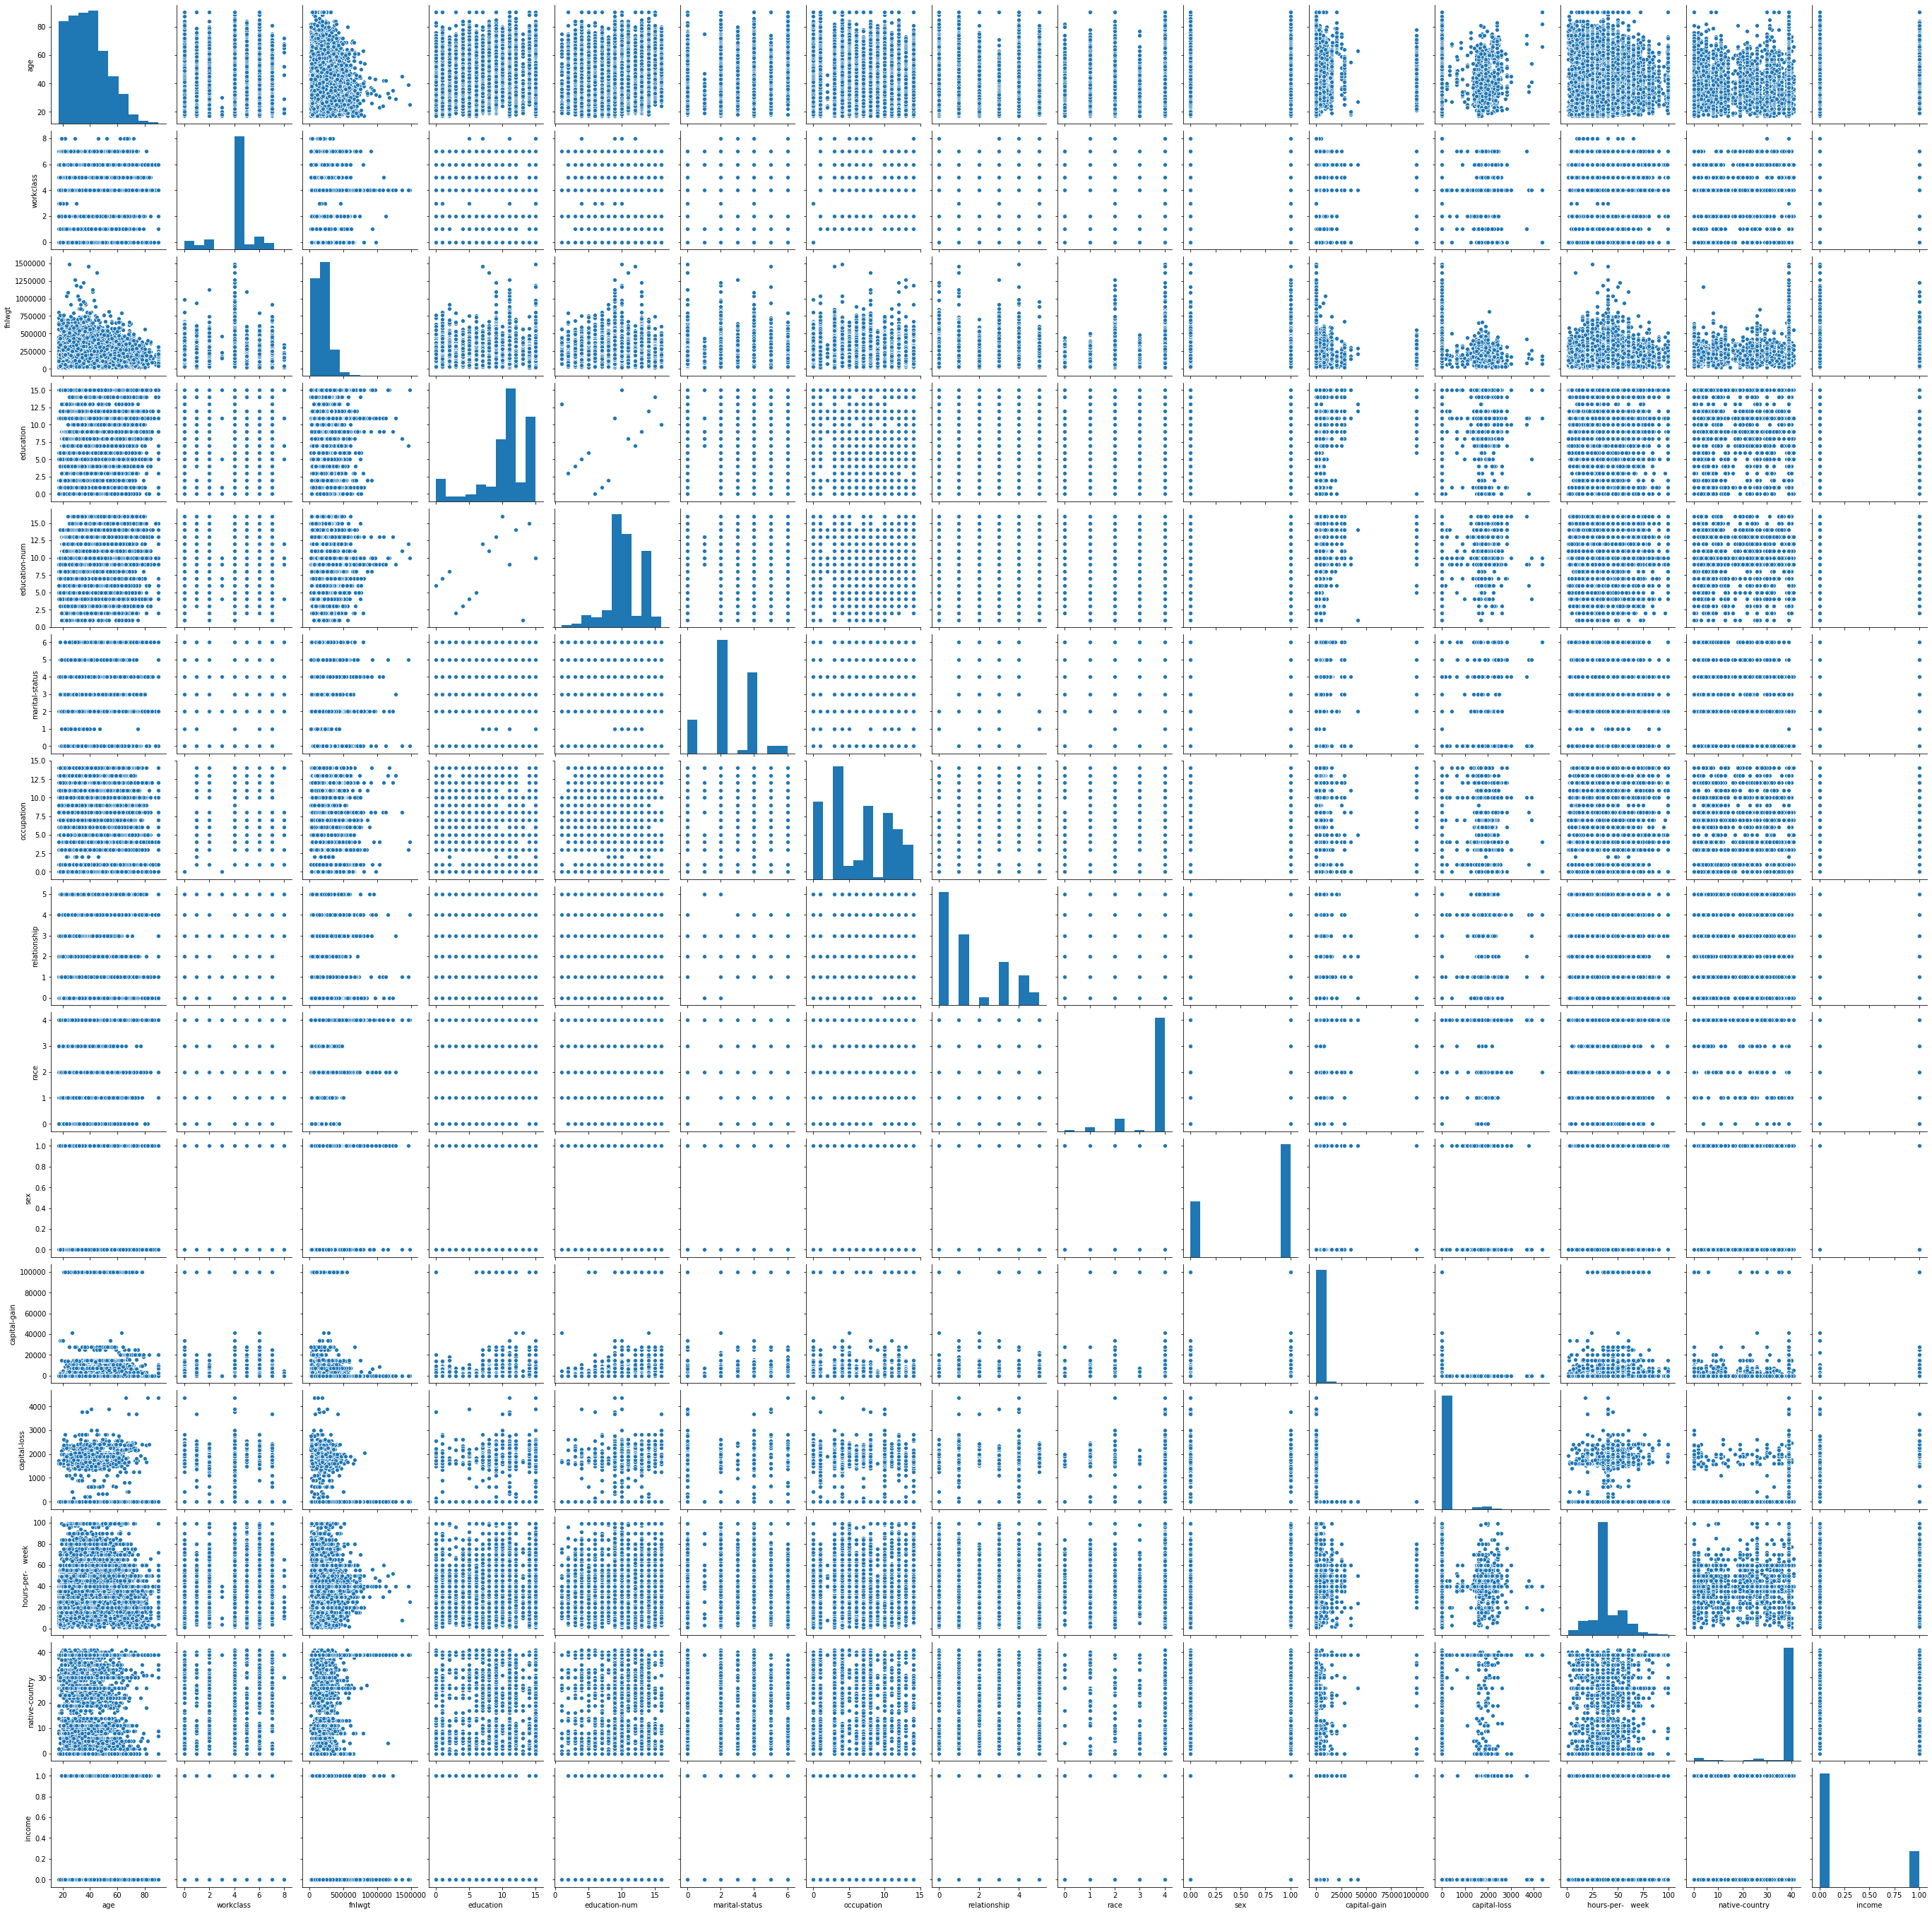

In [19]:
sns.pairplot(df)

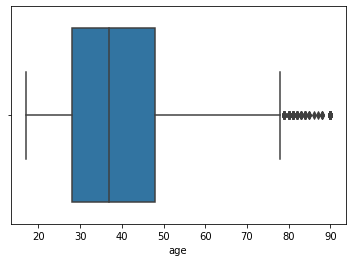

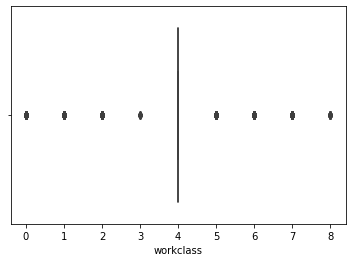

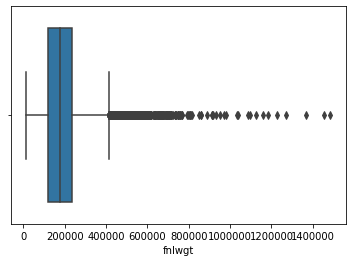

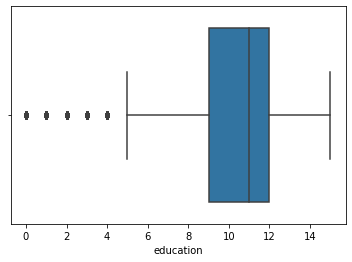

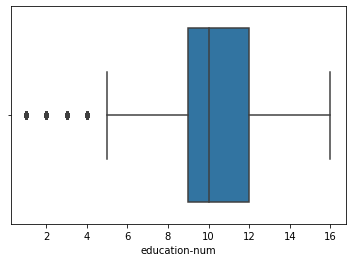

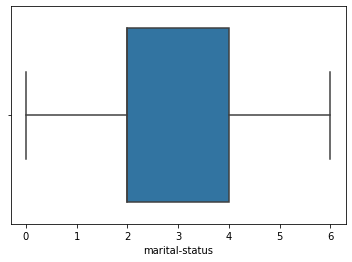

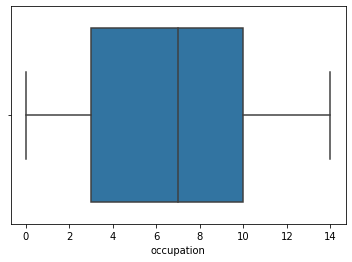

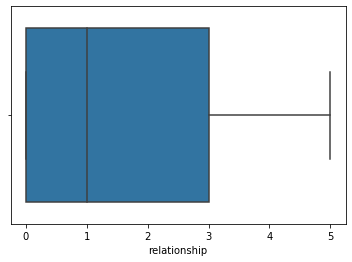

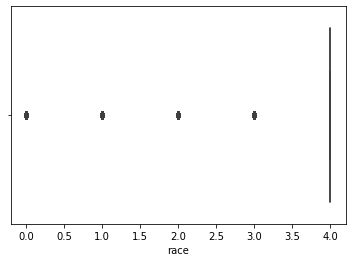

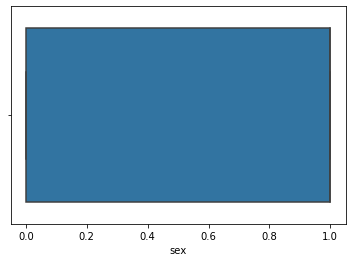

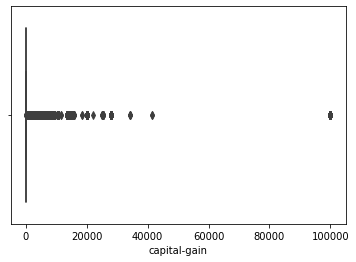

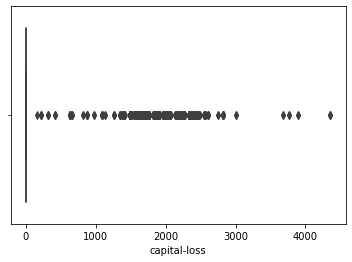

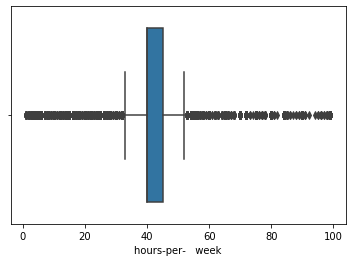

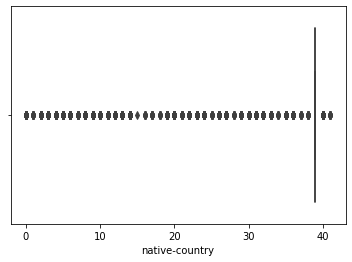

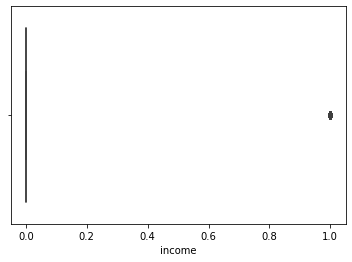

In [20]:
for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()

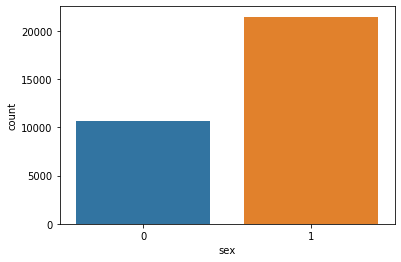

In [21]:
sns.countplot( df['sex'] )

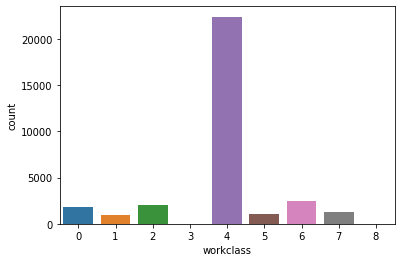

In [22]:
sns.countplot( df['workclass'] )

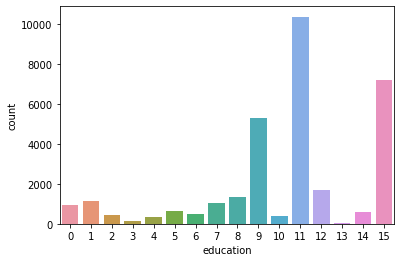

In [23]:
sns.countplot( df['education'] )

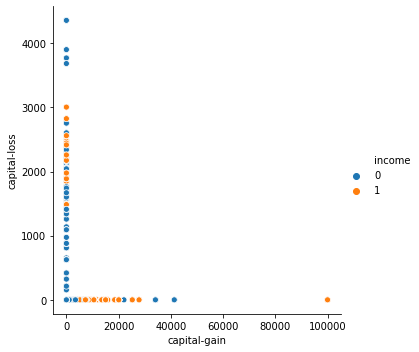

In [24]:
sns.relplot(x='capital-gain', y='capital-loss', hue='income', data=df)

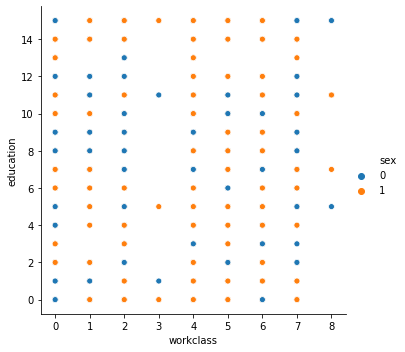

In [25]:
sns.relplot(x='workclass', y='education', hue='sex', data=df)

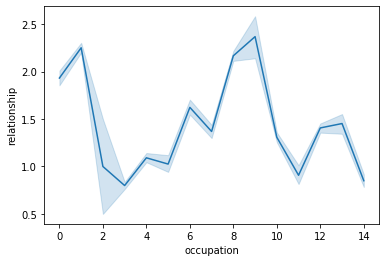

In [26]:
sns.lineplot(x="occupation",y="relationship",data=df)
plt.show()

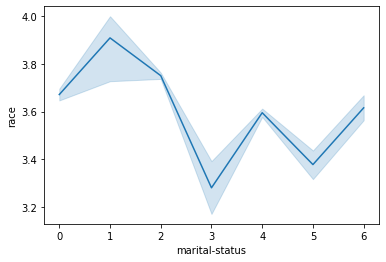

In [27]:
sns.lineplot(x="marital-status",y="race",data=df)
plt.show()

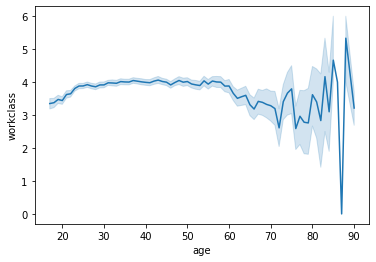

In [28]:
sns.lineplot(x="age",y="workclass",data=df)
plt.show()

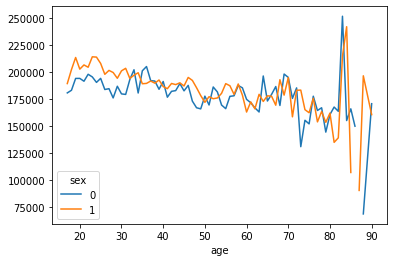

In [29]:
df.pivot_table('fnlwgt', index='age', columns='sex').plot()

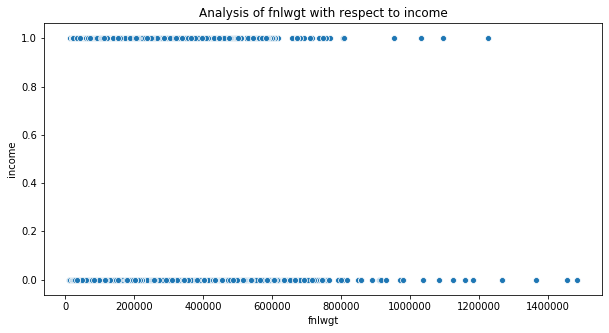

In [30]:
plt.figure(figsize=(10,5))
plt.xlabel("fnlwgt")
plt.ylabel("income")
plt.title("Analysis of fnlwgt with respect to income")
sns.scatterplot(x='fnlwgt',y='income',data=df)

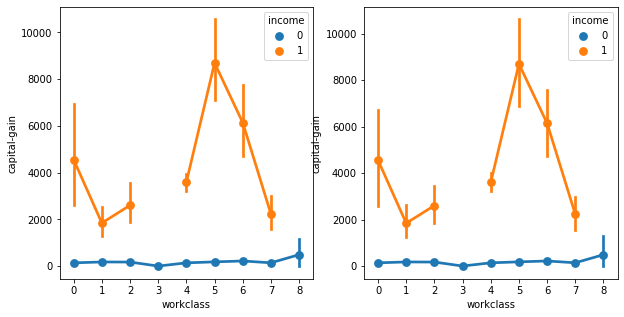

In [31]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='workclass', y='capital-gain', hue='income', data=df, ax=axis1)
sns.pointplot(x='workclass', y='capital-gain', hue='income', data=df, ax=axis2)

Preprocessing

In [32]:
x =df.drop(['income'], axis=1)
y=df['income']

Train-Test-Split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.30,random_state=42)

In [34]:
model=[]

In [35]:
model.append(("LR",LogisticRegression()))
model.append(("LDA",LinearDiscriminantAnalysis()))
model.append(("dtc",DecisionTreeClassifier()))
model.append(("knn",KNeighborsClassifier()))
model.append(("gnb",GaussianNB()))

In [36]:
result=[]
names=[]

In [37]:
for name,models in model:
    kfold=model_selection.KFold(n_splits=10 ,random_state=7)
    cv_result=model_selection.cross_val_score(models,x_train,y_train,cv=kfold,scoring="accuracy")
    result.append(cv_result)
    names.append(name)
    msg="%s,%f(%f)"%(name,cv_result.mean(),cv_result.std())
    print(msg)

LR,0.788028(0.005509)
LDA,0.815265(0.010765)
dtc,0.811927(0.006434)
knn,0.769960(0.005379)
gnb,0.794036(0.006169)


In [38]:
gdc_model= GradientBoostingClassifier(learning_rate=0.01,random_state=41)
gdc_model.fit(x_train,y_train)
y_pred_gdc=gdc_model.predict(x_test)
y_train_score_gdc=gdc_model.predict(x_train)
print("accuracy of the model is:\nTest ",accuracy_score(y_test, y_pred_gdc, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_gdc, normalize=True,  sample_weight=None))

accuracy of the model is:
Test  0.8435098650051921
Train 0.8414775255896751


In [39]:
from sklearn.externals import joblib
joblib.dump(model,'Census-Income.obj')

['Census-Income.obj']